# Load Dataset

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
co2_data = pd.read_csv('hw5_data_co2.csv')
e_data = pd.read_csv('emissions.csv')

In [4]:
emissions_data=pd.DataFrame()
emissions_data['ds']=e_data['Year']
emissions_data['emissions']=e_data['World | WLD']
emissions_data['ds']=(emissions_data['ds']).astype(str) +"-01-01"
emissions_data.head()

,ds,emissions
0,1960-01-01,9.396706e+06
1,1961-01-01,9.434403e+06
2,1962-01-01,9.818840e+06
3,1963-01-01,1.035575e+07
4,1964-01-01,1.094701e+07


<AxesSubplot:>

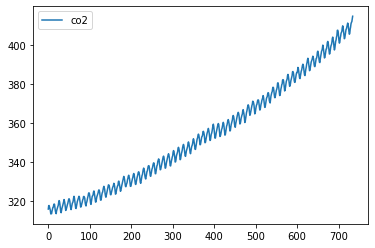

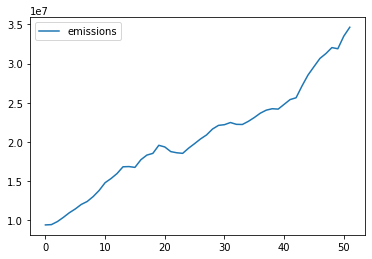

In [5]:
%matplotlib inline
co2_data.plot()
emissions_data.plot()

In [6]:
emissions_data.head()

,ds,emissions
0,1960-01-01,9.396706e+06
1,1961-01-01,9.434403e+06
2,1962-01-01,9.818840e+06
3,1963-01-01,1.035575e+07
4,1964-01-01,1.094701e+07


In [7]:
co2_data.head()

,ds,co2
0,1958-03-15,315.700
1,1958-04-15,317.450
2,1958-05-15,317.510
3,1958-06-15,316.685
4,1958-07-15,315.860


In [8]:
emissions_data['year'] = pd.to_datetime(emissions_data['ds']).dt.year
co2_data['year'] = pd.to_datetime(co2_data['ds']).dt.year
combined_data = emissions_data[['emissions','year']].merge(co2_data[['year','co2']], on='year', how='outer')
combined_data.dropna(inplace=True)
combined_data = combined_data.groupby('year').last()

In [9]:
combined_data

,emissions,co2
year,,
1960,9.396706e+06,316.19
1961,9.434403e+06,317.01
1962,9.818840e+06,317.70
1963,1.035575e+07,318.35
1964,1.094701e+07,318.71
1965,1.143344e+07,319.42
1966,1.200945e+07,321.03
1967,1.238969e+07,321.96
1968,1.301719e+07,322.89


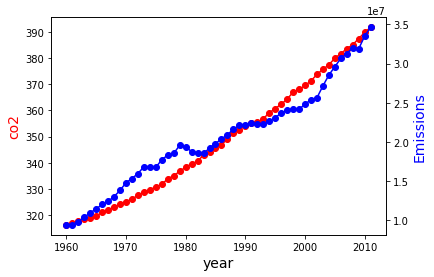

In [10]:
# create figure and axis objects with subplots()
fig,ax = plt.subplots()
ax.plot(combined_data.index, combined_data['co2'], color="red", marker="o")
ax.set_xlabel("year",fontsize=14)
ax.set_ylabel("co2",color="red",fontsize=14)
ax2=ax.twinx()
ax2.plot(combined_data.index, combined_data['emissions'],color="blue",marker="o")
ax2.set_ylabel("Emissions",color="blue",fontsize=14)
plt.show()

<AxesSubplot:xlabel='year'>

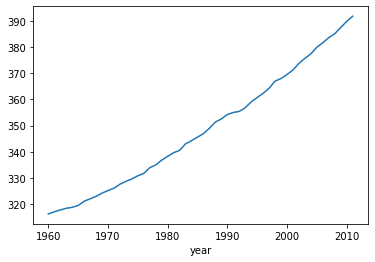

In [11]:
combined_data['co2'].plot()

# Split y into Train and Test Groups

In [12]:
from sktime.forecasting.all import temporal_train_test_split

In [33]:
y_train, y_test = temporal_train_test_split(combined_data)

In [34]:
y_train

,emissions,co2
year,,
1960,9.396706e+06,316.19
1961,9.434403e+06,317.01
1962,9.818840e+06,317.70
1963,1.035575e+07,318.35
1964,1.094701e+07,318.71
1965,1.143344e+07,319.42
1966,1.200945e+07,321.03
1967,1.238969e+07,321.96
1968,1.301719e+07,322.89


In [35]:
y_test

,emissions,co2
year,,
1999,24191199.0,368.00
2000,24799921.0,369.53
2001,25408643.0,371.24
2002,25639664.0,373.78
2003,27154135.0,375.69
2004,28543928.0,377.44
2005,29614692.0,379.96
2006,30667121.0,381.66
2007,31286844.0,383.61


# ARIMAX

In [14]:
from sktime.forecasting.arima import ARIMA

Add a difference with the middle parameter

In [15]:
arima_model = ARIMA(order=(1,1,1))

In [16]:
arima_model.fit(y=y_train['co2'], x=y_train['emissions'])

ARIMA(order=(1, 1, 1))

In [26]:
arima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   39
Model:               SARIMAX(1, 1, 1)   Log Likelihood                 -30.113
Date:                Sat, 01 May 2021   AIC                             68.226
Time:                        11:38:06   BIC                             74.776
Sample:                             0   HQIC                            70.556
                                 - 39                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0875      0.199      0.441      0.659      -0.302       0.477
ar.L1          0.9350      0.147      6.340      0.000       0.646       1.224
ma.L1         -0.7417      0.267     -2.782      0.005      -1.264      -0.219
sigma2         0.2819      0.078      3.612      0.000       0.129       0.435
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 1.59
Prob(Q):                              0.90   Prob(JB):                         0.45
Heteroskedasticity (H):               3.04   Skew:                             0.47
Prob(H) (two-sided):                  0.06   Kurtosis:                         2.65
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [45]:
fh = list(range(1, 1+len(y_test)))
y_pred = arima_model.predict(X=y_test['emissions'], fh=fh )

In [46]:
y_pred

1999    368.749068
2000    370.499975
2001    372.224552
2002    373.924511
2003    375.601454
2004    377.256877
2005    378.892180
2006    380.508671
2007    382.107574
2008    383.690033
2009    385.257116
2010    386.809824
2011    388.349093
dtype: float64

In [57]:
y_test

,emissions,co2
year,,
1999,24191199.0,368.00
2000,24799921.0,369.53
2001,25408643.0,371.24
2002,25639664.0,373.78
2003,27154135.0,375.69
2004,28543928.0,377.44
2005,29614692.0,379.96
2006,30667121.0,381.66
2007,31286844.0,383.61


In [47]:
import statsmodels.api as sm

In [53]:
endog = combined_data['co2']
exog = combined_data['emissions']

In [54]:
endog.index

Int64Index([1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970,
            1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981,
            1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992,
            1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003,
            2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011],
           dtype='int64', name='year')

In [55]:
mod = sm.tsa.statespace.SARIMAX(endog, exog, order=(1,1,1))
exreg = mod.fit(disp=False)
print(exreg.summary())

                               SARIMAX Results                                
Dep. Variable:                    co2   No. Observations:                   52
Model:               SARIMAX(1, 1, 1)   Log Likelihood                -982.115
Date:                Sat, 01 May 2021   AIC                           1972.230
Time:                        11:58:59   BIC                           1979.958
Sample:                             0   HQIC                          1975.183
                                 - 52                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
emissions   1.743e-06   1.78e-08     98.196      0.000    1.71e-06    1.78e-06
ar.L1               0      0.025          0      1.000      -0.049       0.049
ma.L1         -0.8805      0.002   -416.771      0.0

c:\users\meenu\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
c:\users\meenu\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
c:\users\meenu\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\users\meenu\appdata\local\programs\python\python38\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_ret

In [59]:
exog_forecast = data.loc['1959':'1981','m2']
predictions = res.predict(start = '1959', end = '1981',exog=exog_forecast, dynamic= True)
predictions

c:\users\meenu\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


ValueError: Out-of-sample operations in a model with a regression component require additional exogenous values via the `exog` argument.

Plot the results where blue is actual and the red is your prediction

In [ ]:
y_test['co2'].plot()
y_pred.plot(color='red')

# Evaluate yhat

In [ ]:
from sktime.performance_metrics.forecasting import smape_loss

In [ ]:
smape_loss(y_test['co2'], y_pred )

# Choose Best Arima Combinations Based on AIC and BIC

In [ ]:
import warnings
import pandas as pd
warnings.filterwarnings('ignore')

In [ ]:
results = []
for p in [0,1,2]:
    for d in [0,1]:
        for q in [0,1,2]:
            arima_model = ARIMA(order=(p,d,q))
            arima_model.fit(y_train['co2'], x=y_train['emissions'])
            arima_summary = arima_model.summary()
            aic = float(arima_summary.as_text().split('AIC')[1].split('\n')[0].strip())
            bic = float(arima_summary.as_text().split('BIC')[1].split('\n')[0].strip())
            results.append(
                {
                    'p':p,
                    'd':d,
                    'q': q,
                    'aic':aic,
                    'bic': bic
                    
                }
            )
            
            
results = pd.DataFrame(results)

In [ ]:
results